<a href="https://colab.research.google.com/github/fastdatascience/clinical_trial_risk/blob/fixes_nov_2022/train/ctgov/TrainNumArmsClassifier_23_NaiveBayes_predetermined_vocab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import spacy
import pandas as pd
import re
import os
import sys
import pickle as pkl
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import json

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, auc, roc_curve
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_annotations = pd.read_csv("/content/drive/MyDrive/data/all_annotations.csv")


# Get data

In [4]:
vocab = {"cancer","tumor","ati","carfilzomib","hcc","dose","grade","cell","response","df","hcc","trametinib","tho","riz","pet","ct","relapsed","cycle","myeloma","eisai","reo","lymphoma","emtansine","ctcae","measurable","trastuzumab","gvhd","stem","ctep","recist","transplantation","cell","lung","erlotinib","everolimus","gdc","lenalidomide","fludarabine","fdg","acalabrutinib","bortezomib","metastatic","cytometry","tumors","cell","lymphoma","solid","lesions","lymph","solid","tumors","mrd","pazopanib","oncol","marrow","bone","marrow","opy","diameters","cll","refractory","prostate","cancer","center","cell","transplantation","relapsed","refractory","hodgkin","advanced","paclitaxel","ark","eti","pli","nci","pembrolizumab","nhl","avelumab","node","multiple","myeloma","conditioning","eti","cooperative","hpv","toxicity","sof","ovarian","donor","ecog","abt","correlative","neoadjuvant","dlbcl","ovarian","cancer","ucb","carcinoma","radiation","adverse","immune","stem","cell","neutrophil","autologous","allogeneic","oncology","nodes","capecitabine","bevacizumab","lymph","nodes","pd","therapy","rituximab","gemcitabine","leukemia","limiting","dose","dose","trastuzumab","emtansine","hla","eisai","final","irinotecan","progression","hcv","hct","dsmc","nab","paclitaxel","cmv","monoclonal","ipilimumab","colorectal","alfa","progressive","hematopoietic","measurable","lesions","pd","myeloid","cells","cyclophosphamide","tyrosine","cisplatin","nab","eastern","her","ctep","cancer","bmt","aml","spleen","androgen","stable","disease","measurable","disease","antitumor","every","grade","survival","locally","advanced","cu","men","phase","progression","free","immune","related","eti","ng","partial","response","lesion","osi","nodal","complete","response","flow","cytometry","rt","alk","target","lesions","tumor","cells","nsclc","clin","oncol","aspirate","small","cell","ctc","permanently","fdg","pet","melanoma","stage","pli","ca","bone","unacceptable","nk","squamous","consolidation","alopecia","radiation","therapy","prostate","cancer","cetuximab","tumor","response","amgen","metastases","cit","response","cr","mutations","pneumonitis","colorectal","cancer","ert","progressive","disease","response","criteria","best","response","free","survival","staging","ca","tio","sorafenib","response","rate","radiotherapy","transplant","ion","v","longest","metastasis","ort","tissue","mds","sum","limiting","toxicity","anti","pd","unequivocal","pn","lung","cancer","imaging","rt","ny","duration","response","ctcae","grade","anti","tumor","anc","dose","lung","pd","l","ctsu","dlts","lymph","node","graft","neutropenia","breast","nivolumab","unacceptable","toxicity","response","evaluation","dose","reductions","anti","cancer","cytotoxic","tremelimumab","phase","ii","ct","mri","placebo","randomized","sars","dapagliflozin","nordisk","blind","visit","icu","diabetes","analysis","crit","randomisation","ncbi","nlm","ketamine","postoperative","mi","randomization","inferiority","medical","opioid","hypoglycemia","double","matching","prior","randomization","type","crossover","outcomes","randomized","controlled","metformin","matching","placebo","smoking","atezolizumab","antidepressant","controlled","intervention","sided","heart","hospitalized","related","quality","copd","insulin","randomized","mellitus","randomized","placebo","ancova","stratified","efficacy","meta","randomly","ratio","blind","period","discharge","unblinding","unblinded","compared","placebo","analyses","randomized","double","randomized","receive","standard","care","itt","versus","placebo","diabetic","dialysis","blind","placebo","superiority","medication","side","ci","control","compare","random","key","secondary","statistical","randomised","adverse","systematic","statistically","standard","allocated","double","blind","morbidity","placebo","controlled","block","computer","cox","rank","interim","two","scores","procedures","cf","test","hypothesis","sample","one","affiliated","endpoint","monitoring","board","hipaa","one","two","sided","bias","versus","cv","significance","visit","diabetes","mellitus","comparing","recruited","room","surgery","dysfunction","qol","outcome","hb","tr","assumptions","covariates","coordinator","comparator","analysed","prevalence","endpoints","events","recruitment","adverse","effects","statistician","key","feasibility","parallel","criteria","measures","sr","benefit","clinic","effectiveness","informed","function","regression","secondary","committee","detect","intent","treat","to","blinding","cross","hazard","ratio","standard","deviation","hypotheses","amendment","final","placebo","visit","redacted","incorporating","safety","final","triplicate","randomisation","stopping","criteria","schedule","activities","randomized","amended","version","unblinded","double","analyses","concentration","curve","tmax","efficacy","versus","placebo","dose","escalation","pharmacokinetic","pharmacodynamic","prior","dosing","adjudication","randomization","schedule","procedures","objectives","endpoints","strictly","screening","day","samples","may","prior","baseline","social","functional","chemistry","database","lock","exploratory","termination","visit","dose","administration","exclusion","criterion","clinical","tests","follow","assessments","nonclinical","adaptive","randomly","vendor","emergent","investigational","products","tolerability","allocated","bioavailability","prior","randomization","clinical","chemistry","baseline","value","safety","tolerability","monotherapy","starting","dose","reading","interactive","tables","ideation","schedule","assessments","blind","placebo","hypotheses","follow","visit","randomized","double","secondary","efficacy","normalized","ratio","exploratory","endpoints","changes","baseline","efficacy","endpoints","crossover","inferiority","scheduled","visits","efficacy","analysis"}

In [5]:
# import nltk
# nltk.download('stopwords')

In [6]:
# vocab = set(stopwords.words('english')).union(vocab)

In [7]:
for w in "arm", "group", "subgroup", "cohort":
  vocab.add(w)
  vocab.add(w + "s")
vocab.add("armed")


In [8]:
for w in "one", "two", "three", "four", "five", "six", "seven", "eight", "nine", "ten", "single", "double":
  vocab.add(w)

In [9]:
for w in range(1, 11):
  vocab.add(str(w))

In [10]:
with open("/content/drive/MyDrive/data/protocols.pkl.gz", "rb") as f:
    file_to_pages = pkl.load(f)

In [11]:
import operator
texts = []

for i in range(len(df_annotations)):
    file_name = df_annotations.file.iloc[i]
    
    pages= file_to_pages[file_name]

    texts.append(" ".join(pages))
df_annotations["text"] = texts

In [12]:
 del file_to_pages

In [13]:
df_annotations = df_annotations[~df_annotations.num_arms.isna()]

In [14]:
def get_num_arms_clean(num):
    if pd.isna(num):
        return None
    if num >= 3:
        return "3+"
    return str(int(num))
df_annotations["num_arms_clean"] = df_annotations["num_arms"].apply(get_num_arms_clean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [15]:
df_annotations["num_arms_clean"].value_counts()

2     5228
3+    3277
1     3086
Name: num_arms_clean, dtype: int64

In [16]:
labels = list(sorted(set(df_annotations["num_arms_clean"])))

In [17]:
df_train = df_annotations[df_annotations.train_val == "train"]
df_val = df_annotations[df_annotations.train_val == "val"]

In [18]:

# Specially engineered regex to include 95%, 95%ci, etc
vectoriser = CountVectorizer(lowercase=True, vocabulary = vocab, min_df=5,
                            token_pattern=r'\w+', ngram_range=[1,2])

transformer = TfidfTransformer()

nb = MultinomialNB()
model = make_pipeline(vectoriser, transformer, nb)

In [19]:
# df_train_small = df_train.sample(1000)

In [20]:
model.fit(df_train.text, df_train.num_arms_clean)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(min_df=5, ngram_range=[1, 2],
                                 token_pattern='\\w+',
                                 vocabulary={'1', '10', '2', '3', '4', '5', '6',
                                             '7', '8', '9', 'abt',
                                             'acalabrutinib', 'activities',
                                             'adaptive', 'adjudication',
                                             'administration', 'advanced',
                                             'adverse', 'affiliated', 'alfa',
                                             'alk', 'allocated', 'allogeneic',
                                             'alopecia', 'amended', 'amendment',
                                             'amgen', 'aml', 'analysed',
                                             'analyses', ...})),
                ('tfidftransformer', TfidfTransformer()),
                ('multinomialnb', Multin

In [21]:
df_val["y_pred"] = model.predict(df_val.text)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df_val["y_pred"]

12       2
49       1
50       2
51       2
52       2
        ..
11902    1
11903    2
11904    2
11906    1
11907    2
Name: y_pred, Length: 1056, dtype: object

In [23]:
y_pred_proba = model.predict_proba(df_val.text)

In [24]:
y_pred_proba

array([[0.11473313, 0.55465194, 0.33061493],
       [0.444774  , 0.32617583, 0.22905017],
       [0.13394936, 0.56869938, 0.29735126],
       ...,
       [0.10182256, 0.60830127, 0.28987617],
       [0.70122912, 0.19794418, 0.1008267 ],
       [0.18314084, 0.42956222, 0.38729694]])

In [25]:

ground_truths = df_val.num_arms_clean
pred = df_val.y_pred

In [26]:
pred

12       2
49       1
50       2
51       2
52       2
        ..
11902    1
11903    2
11904    2
11906    1
11907    2
Name: y_pred, Length: 1056, dtype: object

In [27]:
acc = accuracy_score(ground_truths, pred)
print (f"accuracy {acc}")

accuracy 0.5464015151515151


In [28]:
pred

12       2
49       1
50       2
51       2
52       2
        ..
11902    1
11903    2
11904    2
11906    1
11907    2
Name: y_pred, Length: 1056, dtype: object

''

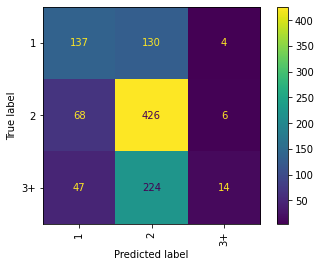

In [29]:
ConfusionMatrixDisplay.from_predictions(ground_truths, pred)
plt.xticks(rotation=90)
;

In [30]:
all_aucs = []
from sklearn.metrics import roc_auc_score
for i, label in enumerate(list(nb.classes_)):
  roc_auc = roc_auc_score(ground_truths==label, y_pred_proba[:,i])
  print (f"ROC AUC {roc_auc}")
  all_aucs.append(roc_auc)
print (np.mean(all_aucs))

ROC AUC 0.8055280043246292
ROC AUC 0.7027805755395684
ROC AUC 0.6936446173800259
0.7339843990814078


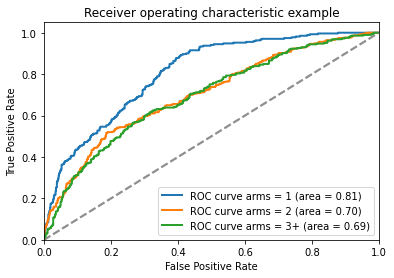

In [31]:
plt.figure()
lw = 2
    
for i, label in enumerate(list(nb.classes_)):
    fpr, tpr, _ = roc_curve(ground_truths==label, y_pred_proba[:,i])
    roc_auc = auc(fpr, tpr)
    plt.plot(
        fpr,
        tpr,
        # color="darkorange",
        lw=lw,
        label=f"ROC curve arms = {label} (area = {roc_auc:0.2f})"
    )
    plt.plot([0, 1], [0, 1], color="gray", alpha=0.5, lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [32]:
fake_document = " ".join(vectoriser.vocabulary_)
vectorised_document = vectoriser.transform([fake_document])
transformed_document = transformer.transform(vectorised_document)
probas = np.zeros((transformed_document.shape[1]))

In [33]:
vocab_lookup = {i:w for w, i in vectoriser.vocabulary_.items()}
with open("num_arms_diagnostics.txt", "w", encoding="utf-8") as f:
  for prediction_idx in [0, 1, 2]:
        f.write(f"Strongest predictors for class {nb.classes_[prediction_idx]}\n")
        for i in range(transformed_document.shape[1]):
            zeros = np.zeros(transformed_document.shape)
            zeros[0, i] = transformed_document[0, i]
            proba = nb.predict_log_proba(zeros)
            probas[i] = proba[0, prediction_idx]


        for ctr, j in enumerate(np.argsort(-probas)):
          f.write(f"{ctr}\t{vocab_lookup[j]}\n")

In [34]:
import bz2
with bz2.open("arms_classifier_document_level.pkl.bz2", "wb") as f:
    pkl.dump(model, f)

In [35]:
# from google.colab import runtime
# runtime.unassign()